# RPy2 in Sage 8.9

- plotting via ggplot2
- exchanging data back and forth with R

In [1]:
%load_ext rpy2.ipython

In [2]:
import rpy2.robjects as ro

In [3]:
import math, datetime
import rpy2.robjects.lib.ggplot2 as ggplot2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr, data
base = importr('base')

/ext/sage/sage-8.9_1804/local/lib/python2.7/site-packages/rpy2/robjects/lib/ggplot2.py:67: UserWarning: This was designed againt ggplot2 version 2.1.0 but you have 3.2.1
  warnings.warn('This was designed againt ggplot2 version %s but you have %s' % (TARGET_VERSION, ggplot2.__version__))


In [4]:
datasets = importr('datasets')
mtcars = data(datasets).fetch('mtcars')['mtcars']

In [5]:
mtcars

R object with classes: ('data.frame',) mapped to:
<DataFrame - Python:0x7febbe80cb90 / R:0x55dc724aa428>
[Float..., Float..., Float..., ..., Float..., Float..., Float...]
  mpg: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7febbe6bcab8 / R:0x55dc724abf20>
[21.000000, 21.000000, 22.800000, ..., 19.700000, 15.000000, 21.400000]
  cyl: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7febbe6bc200 / R:0x55dc73182b60>
[6.000000, 6.000000, 4.000000, ..., 6.000000, 8.000000, 4.000000]
  disp: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7febbe659170 / R:0x55dc7318edf0>
[160.000000, 160.000000, 108.000000, ..., 145.000000, 301.000000, 121.000000]
  ...
  mpg: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7febbe65956

## Plotting via a temp file

In [6]:
# credits: https://stackoverflow.com/questions/15060838/using-rpy2-with-ipython-notebooks

import uuid
from rpy2.robjects.packages import importr
from IPython.core.display import Image

grdevices = importr('grDevices')


def ggplot_notebook(gg, width=800, height=600, name=None):
    fn = name or '{uuid}.png'.format(uuid=uuid.uuid4())
    grdevices.png(fn, width=width, height=height)
    gg.plot()
    grdevices.dev_off()
    return Image(filename=fn)

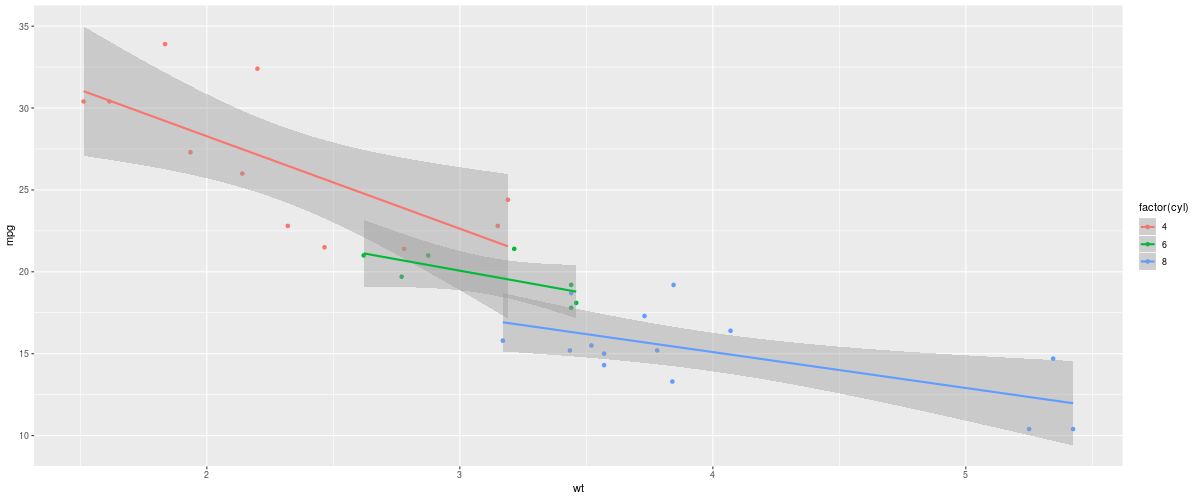

In [10]:
pp = ggplot2.ggplot(mtcars) + \
     ggplot2.aes_string(x='wt', y='mpg', col='factor(cyl)') + \
     ggplot2.geom_point() + \
     ggplot2.geom_smooth(ggplot2.aes_string(group = 'cyl'), method = 'lm')

ggplot_notebook(pp, name="rpy2_cars.png", width=1200r, height=500r)

## plotting directly via %%R

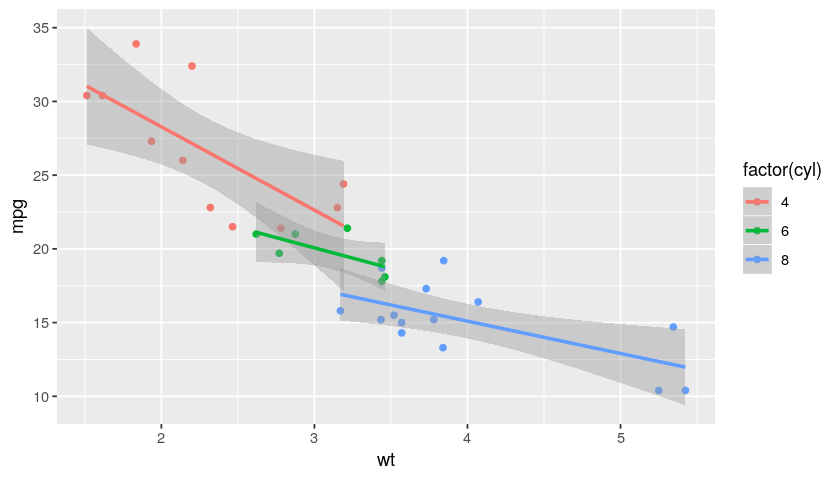

In [8]:
%%R -i mtcars -w 7 -h 4 --units in -r 120
require(ggplot2)
pp = ggplot(mtcars) +
     aes_string(x='wt', y='mpg', col='factor(cyl)') +
     geom_point() +
     geom_smooth(aes_string(group = 'cyl'), method = 'lm')
plot(pp)

## Sage → R

In [22]:
xx_sage = random_vector(RDF, 100)
xx_py = xx_sage.numpy()

In [23]:
%%R -i xx_py
summary(xx_py)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.95542 -0.48588  0.13339  0.06276  0.56787  0.99383 


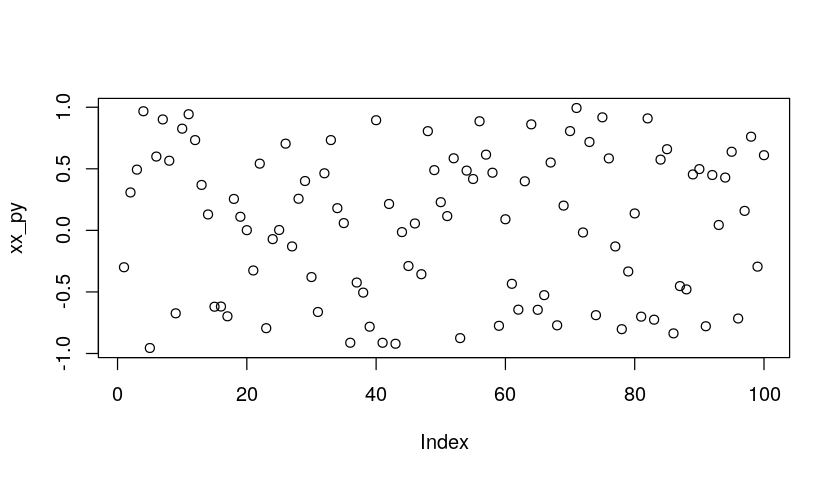

In [24]:
%%R -i xx_py -w 7 -h 4 --units in -r 120
plot(xx_py)

## Sage → Python → R → Python → Sage

In [26]:
%%R -i xx_py -o yy_py

yy_py = cumsum(xx_py)

In [27]:
yy_py

array([-0.29959186,  0.00819633,  0.5014845 ,  1.46897639,  0.51355861,
        1.11310686,  2.01407783,  2.57973053,  1.90591932,  2.73190318,
        3.6750943 ,  4.40820266,  4.77717031,  4.90649039,  4.28637113,
        3.66760016,  2.96955911,  3.22482225,  3.33531743,  3.33691204,
        3.01120552,  3.55310874,  2.75855311,  2.68736847,  2.69037714,
        3.39465425,  3.26428663,  3.52099798,  3.92176095,  3.54252316,
        2.87960765,  3.34305752,  4.07628441,  4.25664763,  4.31560434,
        3.40292482,  2.97924658,  2.47375642,  1.69119946,  2.58579959,
        1.6728068 ,  1.88714029,  0.96625172,  0.95218154,  0.6626657 ,
        0.7187147 ,  0.36253844,  1.16840191,  1.65759923,  1.88650748,
        2.00241252,  2.58792415,  1.71273724,  2.19807815,  2.61523631,
        3.50146605,  4.1164638 ,  4.58475693,  3.80959032,  3.89974368,
        3.46567204,  2.82161185,  3.22021485,  4.0811679 ,  3.43591413,
        2.90972107,  3.46071729,  2.68948281,  2.89050262,  3.69

In [29]:
yy_sage = vector(RDF, yy_py)
yy_sage

(-0.2995918580329151, 0.008196329254149592, 0.5014844961518963, 1.4689763946714813, 0.5135586103559509, 1.1131068611590293, 2.0140778258627607, 2.5797305251785563, 1.9059193154763727, 2.7319031821256656, 3.6750943015435658, 4.408202657910294, 4.777170306397774, 4.90649039468434, 4.286371126760681, 3.667600164809161, 2.969559108707865, 3.2248222494943075, 3.3353174327743487, 3.3369120400329337, 3.0112055219659424, 3.553108736382056, 2.7585531074578977, 2.6873684671698888, 2.6903771384058555, 3.3946542496864027, 3.264286630036528, 3.520997981555216, 3.921760947873978, 3.5425231566468756, 2.879607645841621, 3.343057524106938, 4.076284410303387, 4.2566476325621805, 4.315604336177528, 3.4029248229195543, 2.9792465827218315, 2.4737564245987187, 1.6911994603052485, 2.585799594624631, 1.672806799350057, 1.8871402888043514, 0.9662517249921629, 0.9521815372301856, 0.6626656993703699, 0.7187147003151491, 0.36253843776469274, 1.1684019085721185, 1.657599229499032, 1.8865074778139324, 2.00241251514

In [30]:
type(yy_sage)

<type 'sage.modules.vector_real_double_dense.Vector_real_double_dense'>

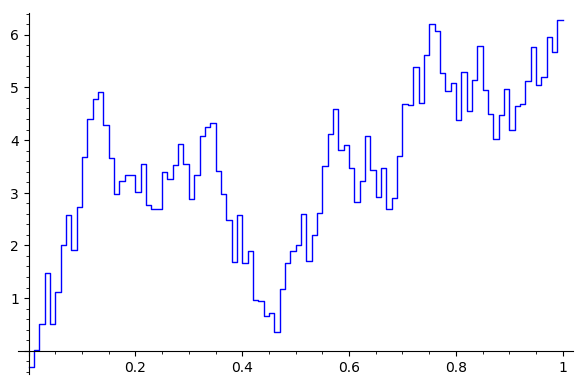

In [31]:
plot(yy_sage)